In [62]:
from attacks import *
from datasets import *
from models import *
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load data
dataset = CIFAR10Dataset()
x, y = dataset.get_10_dataset()
name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## DenseNet 40
densenet40 = CIFAR10_densenet40()

In [59]:

## DenseNet 40
X_test, Y_test, Y_test_target_ml, Y_test_target_ll = get_data_subset_with_systematic_attack_labels(
    dataset=dataset, model=densenet40, balanced=True, num_examples=100
)


Loading the dataset...
Evaluating the target model...
Test accuracy on benign examples 94.84%
Mean confidence on ground truth classes 92.15%
Selected 100 examples.
Test accuracy on selected benign examples 100.00%
Mean confidence on ground truth classes, selected 95.55%



<Figure size 432x288 with 0 Axes>

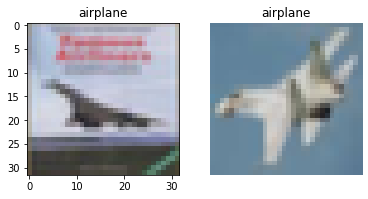

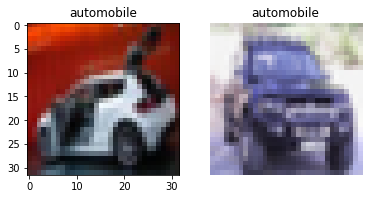

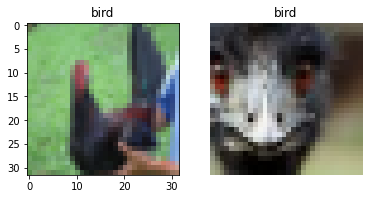

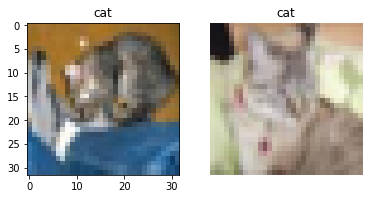

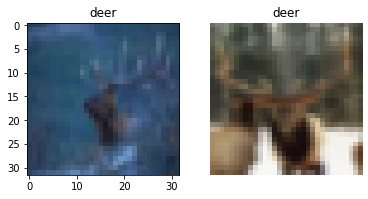

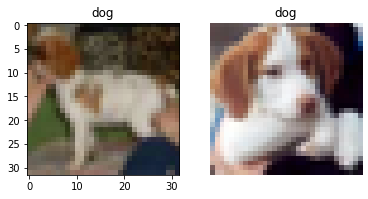

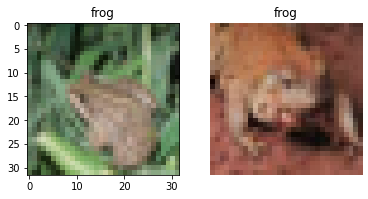

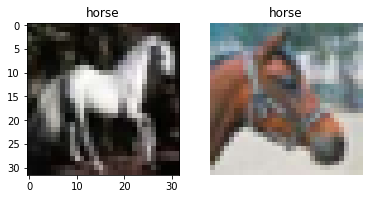

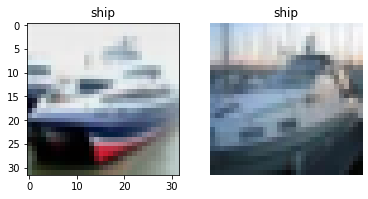

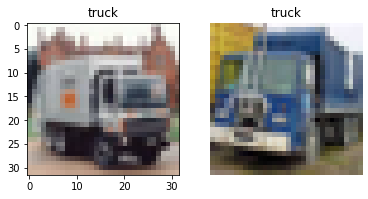

In [58]:

for i in range(10):
    plt.figure(i)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test1[i])
    ax1.set_title(name[i])
    ax2.imshow(X_test1[i+10])
    ax2.set_title(name[i])
    plt.axis('off')

In [71]:
## ResNet20
from models import resnet
input_shape = X_test.shape[1:]
depth = 20
version = 1
resnet20 = RESNET.My_Resnet(input_shape, depth, version, model_path="saved_models/cifar10_ResNet20v1_model.084.h5")

Learning rate:  0.001


In [72]:
## ResNet20
X_test, Y_test, Y_test_target_ml, Y_test_target_ll = get_data_subset_with_systematic_attack_labels(
    dataset=dataset, model=resnet20, balanced=True, num_examples=100
)

Loading the dataset...
Evaluating the target model...
Test accuracy on benign examples 100.00%
Mean confidence on ground truth classes 99.86%
Selected 100 examples.
Test accuracy on selected benign examples 100.00%
Mean confidence on ground truth classes, selected 99.83%



In [73]:
# FGSM attack on both models
fgsm = Attack_FastGradientMethod(eps=0.05)
X_test_adv_fgsm = fgsm.attack(densenet40, X_test, Y_test)
Y_test_adv_pred_fgsm=densenet40.predict(X_test_adv_fgsm)
print ("FGSM attack on densenet40")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_fgsm, Y_test_adv_pred=Y_test_adv_pred_fgsm,
                              Y_test_target=Y_test, targeted=False)

X_test_adv_fgsm_resnet = fgsm.attack(resnet20, X_test, Y_test)
Y_test_adv_pred_fgsm_resnet=resnet20.predict(X_test_adv_fgsm)
print ("FGSM attack on resnet20")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_fgsm_resnet, Y_test_adv_pred=Y_test_adv_pred_fgsm_resnet,
                              Y_test_target=Y_test, targeted=False)



FGSM attack on densenet40
Success rate: 86.00%, Misclassification rate: 86.00%, Mean confidence: 97.21%
Li dist: 0.0510, L2 dist: 2.7849, L0 dist: 99.7%
FGSM attack on resnet20
Success rate: 96.00%, Misclassification rate: 96.00%, Mean confidence: 99.49%
Li dist: 0.0510, L2 dist: 2.7829, L0 dist: 99.7%


{'success_rate': 0.96,
 'mean_confidence': 0.9948611599393189,
 'mean_l2_dist': 2.78291290145941,
 'mean_li_dist': 0.05098041892051697,
 'mean_l0_dist': 0.9973246256510416}

In [83]:
# Test transferability
Y_test_adv_pred_fgsm_tran=densenet40.predict(X_test_adv_fgsm_resnet)
Y_test_adv_pred_fgsm_resnet_tran=resnet20.predict(X_test_adv_fgsm)

print ("Test transferability: FGSM attack on densenet40 and predict on resnet20")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_fgsm_resnet, Y_test_adv_pred=Y_test_adv_pred_fgsm_resnet_tran,
                              Y_test_target=Y_test, targeted=False)
print ("Test transferability: FGSM attack on resnet20 and predict on densenet40")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_fgsm, Y_test_adv_pred=Y_test_adv_pred_fgsm_tran,
                              Y_test_target=Y_test, targeted=False)

Test transferability: FGSM attack on densenet40 and predict on resnet20
Success rate: 29.00%, Misclassification rate: 29.00%, Mean confidence: 90.35%
Li dist: 0.0510, L2 dist: 2.7967, L0 dist: 99.8%
Test transferability: FGSM attack on resnet20 and predict on densenet40
Success rate: 43.00%, Misclassification rate: 43.00%, Mean confidence: 95.90%
Li dist: 0.0510, L2 dist: 2.7909, L0 dist: 99.8%


{'success_rate': 0.43000000000000005,
 'mean_confidence': 0.9589880295097828,
 'mean_l2_dist': 2.790935154380828,
 'mean_li_dist': 0.05098041146993637,
 'mean_l0_dist': 0.9977743459302325}

In [91]:
jsma = Attack_DeepFool()
X_test_adv_jsma = jsma.attack(densenet40, X_test, Y_test)
Y_test_adv_pred_jsma=densenet40.predict(X_test_adv_jsma)
print ("JSMA attack on densenet40")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_jsma, Y_test_adv_pred=Y_test_adv_pred_jsma,
                              Y_test_target=Y_test, targeted=False)

y_jsma_idx = np.argmax(Y_test_adv_pred_jsma, axis=1)

>> Compiling the gradient TensorFlow functions. This might take some time...
>> Computing gradient function...
Success rate: 97.00%, Misclassification rate: 97.00%, Mean confidence: 86.08%
Li dist: 0.0275, L2 dist: 0.2304, L0 dist: 99.1%


In [118]:

X_test_adv_jsma_resnet = jsma.attack(resnet20, X_test, Y_test)
Y_test_adv_pred_jsma_resnet=resnet20.predict(X_test_adv_jsma)
print ("JSMA attack on resnet20")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_jsma_resnet, Y_test_adv_pred=Y_test_adv_pred_jsma_resnet,
                              Y_test_target=Y_test, targeted=False)

>> Compiling the gradient TensorFlow functions. This might take some time...
>> Computing gradient function...


/home/jasonmeow/Jason/GTAttackPod/attacks/lts4/deepfool.py:44: RuntimeWarning: divide by zero encountered in float_scalars
  pert_k = abs(f_k)/np.linalg.norm(w_k.flatten())


JSMA attack on resnet20
Success rate: 0.00%, Misclassification rate: 0.00%, Mean confidence: nan%
Li dist: nan, L2 dist: nan, L0 dist: nan%


/home/jasonmeow/GTAttackPod/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jasonmeow/GTAttackPod/venv/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/jasonmeow/GTAttackPod/venv/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'success_rate': 0.0,
 'mean_confidence': nan,
 'mean_l2_dist': nan,
 'mean_li_dist': nan,
 'mean_l0_dist': nan}

<Figure size 432x288 with 0 Axes>

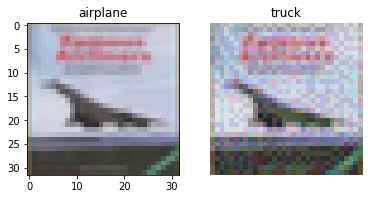

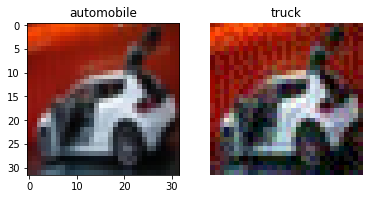

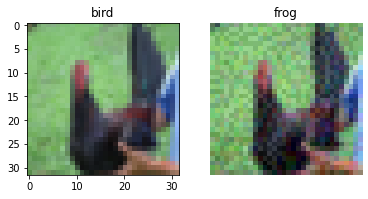

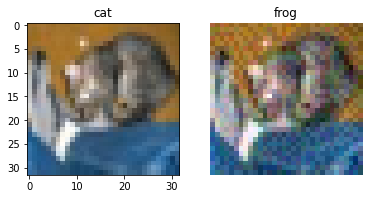

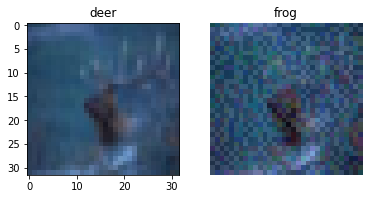

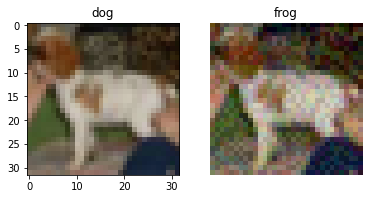

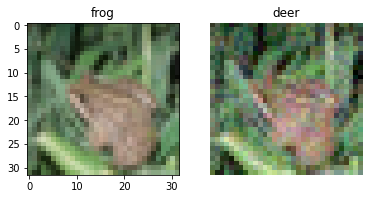

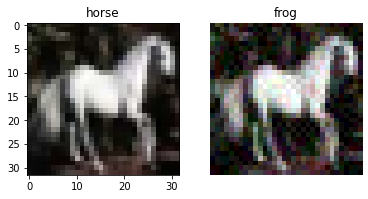

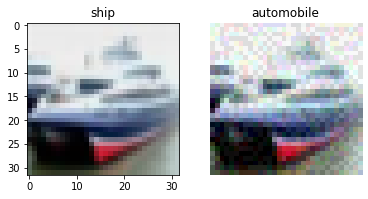

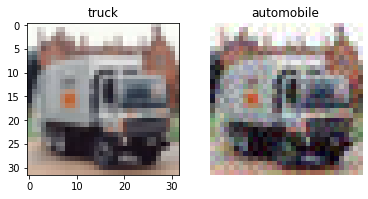

In [85]:
y_fgsm_idx = np.argmax(Y_test_adv_pred_fgsm, axis=1)

for i in range(10):
    plt.figure(i)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test[i])
    ax1.set_title(name[i])
    ax2.imshow(X_test_adv_fgsm[i])
    ax2.set_title(name[y_fgsm_idx[i]])
    plt.axis('off')
    #plt.savefig('/fig/' + name[i] + '.png')

In [ ]:
## Different iteration

fgsm = Attack_FastGradientMethod(eps=0.3)
X_test_adv_fgsm_higheps = fgsm.attack(densenet40, X_test, Y_test)
Y_test_adv_pred_fgsm_higheps=densenet40.predict(X_test_adv_fgsm)
print ("FGSM attack (high eps) on densenet40 ")
evaluate_adversarial_examples(X_test=X_test, Y_test=Y_test,
                              X_test_adv=X_test_adv_fgsm_higheps, Y_test_adv_pred=Y_test_adv_pred_fgsm_higheps,
                              Y_test_target=Y_test, targeted=False)


<Figure size 432x288 with 0 Axes>

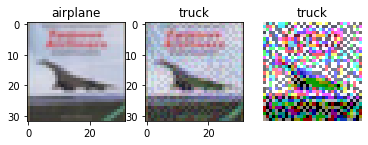

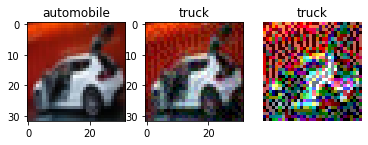

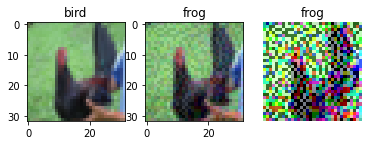

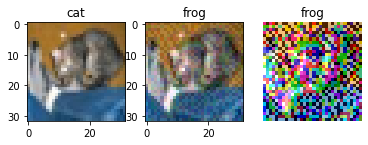

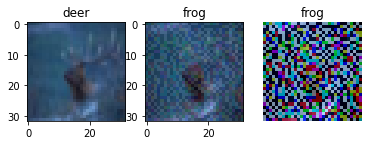

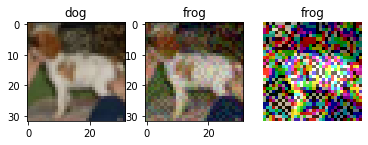

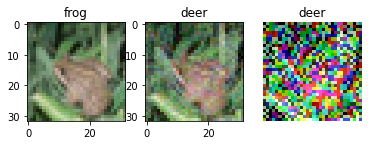

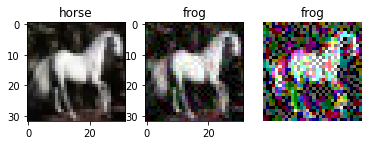

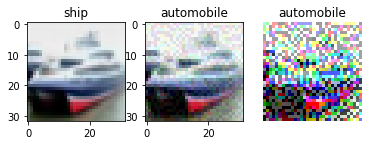

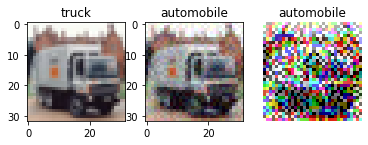

In [82]:
## Different iteration

y_fgsm_idx = np.argmax(Y_test_adv_pred_fgsm, axis=1)
y_fgsm_higheps_idx = np.argmax(Y_test_adv_pred_fgsm_higheps, axis=1)
for i in range(10):
    plt.figure(i)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(X_test[i])
    ax1.set_title(name[i])
    ax2.imshow(X_test_adv_fgsm[i])
    ax2.set_title(name[y_fgsm_idx[i]])
    ax3.imshow(X_test_adv_fgsm_higheps[i])
    ax3.set_title(name[y_fgsm_higheps_idx[i]])
    plt.axis('off')

In [114]:
def filter_label(X, Y, Y_Pred, label=5):
    filter_X, filter_Y_Pred = [], []
    for x, y, y_pred in zip(X, Y, Y_Pred):
        if np.argmax(y) == label:
            filter_X.append(x)
            filter_Y_Pred.append(y_pred)
    return np.array(filter_X), np.array(filter_Y_Pred)
# Divergence of attack effects (Only output airplane)
filter_X, Y_test_adv_pred_fgsm_divergence = filter_label(X_test, Y_test, Y_test_adv_pred_fgsm)

<Figure size 432x288 with 0 Axes>

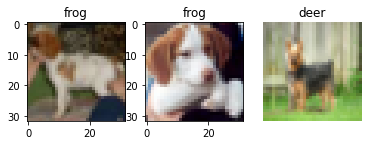

<Figure size 432x288 with 0 Axes>

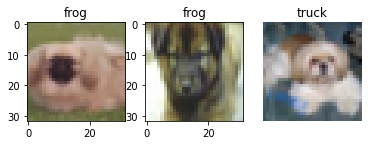

<Figure size 432x288 with 0 Axes>

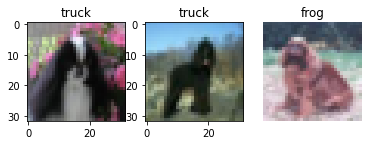

In [116]:

y_fgsm_idx_divergence = np.argmax(Y_test_adv_pred_fgsm_divergence, axis=1)
for i in range(0,9,3):
    plt.figure(i)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(filter_X[i])
    ax1.set_title(name[y_fgsm_idx_divergence[i]])
    ax2.imshow(filter_X[i+1])
    ax2.set_title(name[y_fgsm_idx_divergence[i+1]])
    ax3.imshow(filter_X[i+2])
    ax3.set_title(name[y_fgsm_idx_divergence[i+2]])
    plt.axis('off')